# PROJECT 2

# Dataset Selection and Objective Definition - Classification

**Dataset for Classification Task:** The Major Crime Indicator (MCI) dataset is used for this classification task, which includes occurrences of crimes such as Assault, Break and Enter, Auto Theft, Robbery, and Theft Over.

**Objective:** The objective is to classify crime occurrences into their respective MCI categories various classifiers. The MCI category serves as the target variable, while features such as year, division, location, and other relevant attributes are utilized as input variables. This approach aims to build predictive models that effectively identify the category of crime based on historical data, providing insights for crime analysis and potential prevention strategies.

*Link to Dataset:* https://data.torontopolice.on.ca/datasets/0a239a5563a344a3bbf8452504ed8d68_0/explore

In [172]:
import pandas as pd

df = pd.read_csv(r"C:\Users\pbhav\Downloads\Major_Crime_Indicators_Open_Data_6927126107499016617.csv")

In [173]:
df.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141261609,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,9,...,Assault,Assault,069,Blake-Jones (69),069,Blake-Jones (69),-79.338139,43.675140,-8.831881e+06,5.415306e+06
1,2,GO-20141260033,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,144,Morningside Heights (144),131,Rouge (131),-79.180387,43.806289,-8.814320e+06,5.435514e+06
2,3,GO-20141260127,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault Bodily Harm,Assault,084,Little Portugal (84),084,Little Portugal (84),-79.427105,43.642517,-8.841785e+06,5.410286e+06
3,4,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594,43.654946,-8.840503e+06,5.412199e+06
4,5,GO-20141260618,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,5,...,Assault,Assault,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81),-79.416718,43.655115,-8.840629e+06,5.412225e+06


# Data Preprocessing 

In [174]:
df.shape

(408928, 31)

In [175]:
df.dtypes

OBJECTID               int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR            int64
OCC_YEAR             float64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR               int64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
LONG_WGS84           float64
LAT_WGS84            float64
x                    float64
y                    float64
dtype: object

### Handling Missing values

In [176]:
df.isnull().sum()

OBJECTID               0
EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             136
OCC_MONTH            136
OCC_DAY              136
OCC_DOY              136
OCC_DOW              136
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_EXT                0
OFFENCE                0
MCI_CATEGORY           0
HOOD_158               0
NEIGHBOURHOOD_158      0
HOOD_140               0
NEIGHBOURHOOD_140      0
LONG_WGS84             0
LAT_WGS84              0
x                      0
y                      0
dtype: int64

Since the occurence dates are missing here, but reporting dates are available. So for entries where the exact occurrence date is missing, the report date fields (REPORT_YEAR, REPORT_MONTH, REPORT_DAY, etc.) are considered as a substitute for occurrence date fields (OCC_YEAR, OCC_MONTH, OCC_DAY, etc.). Moreover, this approach makes sense becasuse most crimes are reported close to when they occurred, and the actual occurrence date may not be crucial for analysis

In [177]:
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'], errors='coerce')

In [178]:
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'], errors='coerce')

# Fill only the missing values in each of the target columns based on OCC_DATE
df['OCC_YEAR'] = df['OCC_YEAR'].fillna(df['OCC_DATE'].dt.year)
df['OCC_MONTH'] = df['OCC_MONTH'].fillna(df['OCC_DATE'].dt.month)
df['OCC_DAY'] = df['OCC_DAY'].fillna(df['OCC_DATE'].dt.day)
df['OCC_DOY'] = df['OCC_DOY'].fillna(df['OCC_DATE'].dt.dayofyear)
df['OCC_DOW'] = df['OCC_DOW'].fillna(df['OCC_DATE'].dt.dayofweek)

In [179]:
df['DELAY_DAYS'] = (df['REPORT_DATE'] - df['OCC_DATE']).dt.days

In [180]:
df.isnull().sum().sum()

0

In [181]:
# Checking for duplicate records

df.duplicated().sum()

0

In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,408928.0,2.044645e+05,1.180475e+05,1.000000e+00,1.022328e+05,2.044645e+05,3.066962e+05,4.089280e+05
REPORT_YEAR,408928.0,2.019259e+03,3.139491e+00,2.014000e+03,2.017000e+03,2.019000e+03,2.022000e+03,2.024000e+03
REPORT_DAY,408928.0,1.575351e+01,8.773979e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
REPORT_DOY,408928.0,1.828863e+02,1.027930e+02,1.000000e+00,9.600000e+01,1.840000e+02,2.690000e+02,3.660000e+02
REPORT_HOUR,408928.0,1.270265e+01,6.462341e+00,0.000000e+00,8.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01
OCC_YEAR,408928.0,2.019187e+03,3.218867e+00,1.966000e+03,2.017000e+03,2.019000e+03,2.022000e+03,2.024000e+03
OCC_DAY,408928.0,1.544027e+01,8.939494e+00,1.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
OCC_DOY,408928.0,1.822852e+02,1.033055e+02,1.000000e+00,9.500000e+01,1.830000e+02,2.690000e+02,3.660000e+02
OCC_HOUR,408928.0,1.255677e+01,7.284529e+00,0.000000e+00,6.000000e+00,1.400000e+01,1.900000e+01,2.300000e+01
UCR_CODE,408928.0,1.711039e+03,3.297072e+02,1.410000e+03,1.430000e+03,1.457000e+03,2.120000e+03,2.135000e+03


### Outlier Detection

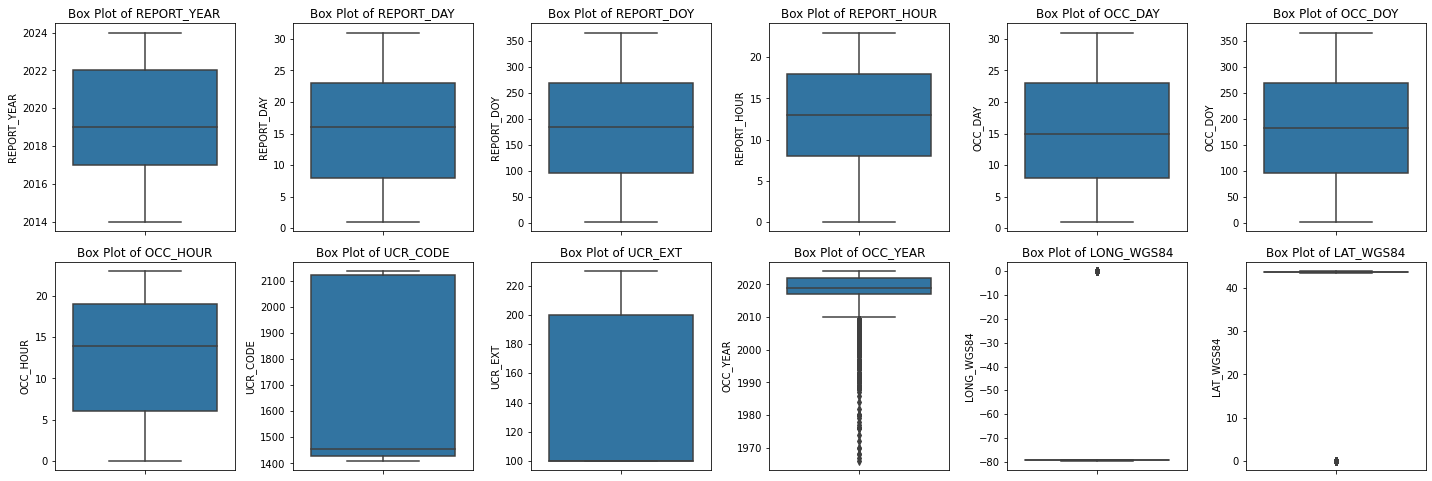

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['REPORT_YEAR','REPORT_DAY','REPORT_DOY','REPORT_HOUR','OCC_DAY','OCC_DOY','OCC_HOUR','UCR_CODE','UCR_EXT','OCC_YEAR', 'LONG_WGS84', 'LAT_WGS84']

# Create box plots for each numerical column
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

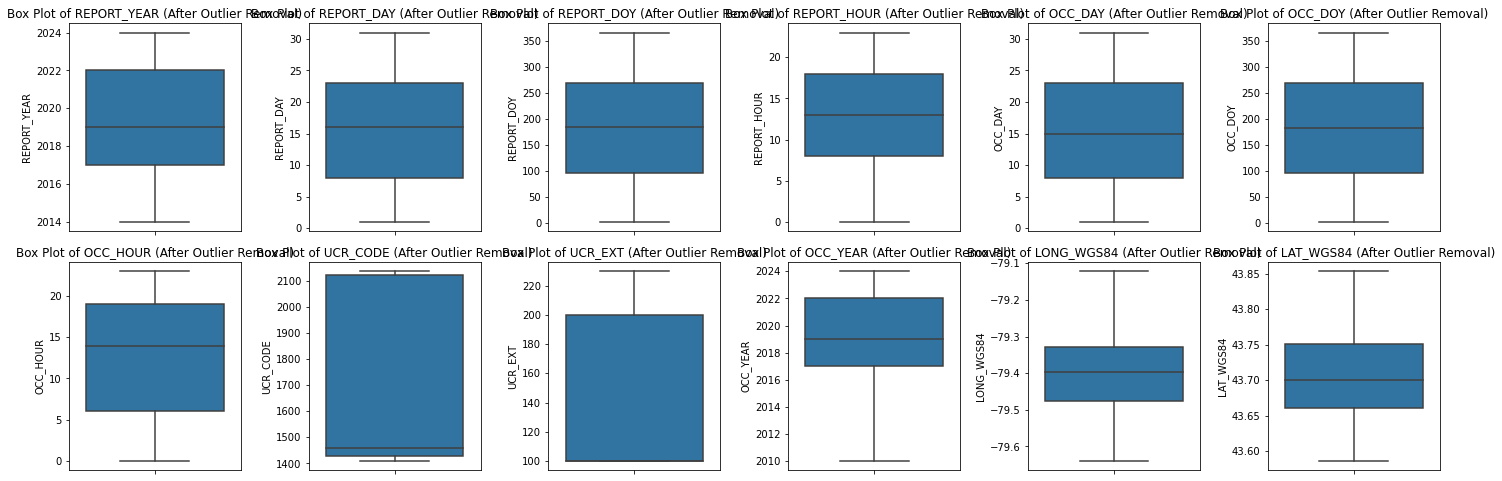

In [184]:
# Handling outliers

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply the function to each numerical column
for col in numerical_cols:
    df = remove_outliers(df, col)

# Verify the removal of outliers
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

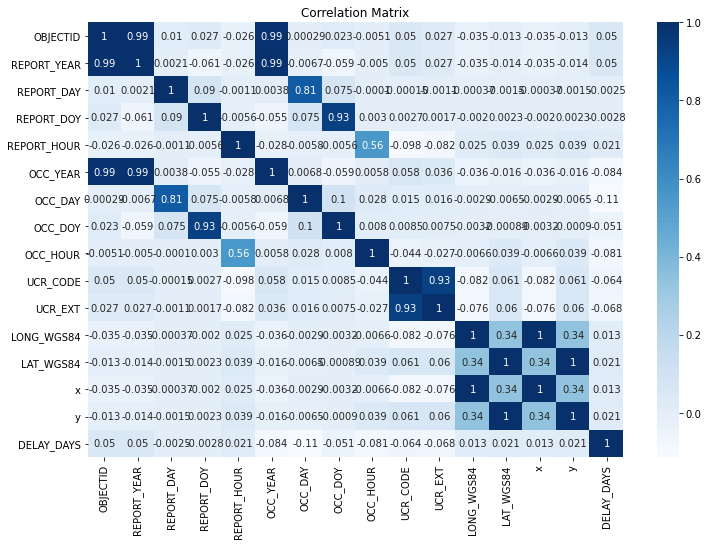

In [185]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

There is a strong correlation between ucr_code and ucr_text, as well as between report_year and object_id. However, these columns are excluded from the modeling process because including ucr_code directly influences the target variable, which may lead to inflated accuracy without meaningful generalization. Ignoring these features helps ensure that the model learns to make predictions based on relevant patterns rather than simply memorizing the target outcomes.

In [186]:
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'], errors='coerce')

# Convert object columns to category type

exclude_columns = ['EVENT_UNIQUE_ID'] 

# Convert object columns to category type excluding the specified ID columns
for col in df.select_dtypes(include=['object']).columns:
    if col not in exclude_columns:
        df[col] = df[col].astype('category')

In [187]:
df.dtypes

OBJECTID                      int64
EVENT_UNIQUE_ID              object
REPORT_DATE          datetime64[ns]
OCC_DATE             datetime64[ns]
REPORT_YEAR                   int64
REPORT_MONTH               category
REPORT_DAY                    int64
REPORT_DOY                    int64
REPORT_DOW                 category
REPORT_HOUR                   int64
OCC_YEAR                    float64
OCC_MONTH                  category
OCC_DAY                     float64
OCC_DOY                     float64
OCC_DOW                    category
OCC_HOUR                      int64
DIVISION                   category
LOCATION_TYPE              category
PREMISES_TYPE              category
UCR_CODE                      int64
UCR_EXT                       int64
OFFENCE                    category
MCI_CATEGORY               category
HOOD_158                   category
NEIGHBOURHOOD_158          category
HOOD_140                   category
NEIGHBOURHOOD_140          category
LONG_WGS84                  

Label encoding is used to change categorical variables into numbers so that the model can understand them. This helps the model learn from the data more effectively.

In [188]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for column in df.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [189]:
scaler = StandardScaler()
numerical_features = ['REPORT_YEAR','REPORT_DAY','REPORT_DOY','REPORT_HOUR','OCC_YEAR','OCC_DAY','OCC_DOY','OCC_HOUR','LONG_WGS84', 'LAT_WGS84', 'x', 'y', 'DELAY_DAYS']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

StandardScaler is applied to normalize the numerical features by scaling them to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model's performance and helps improve the accuracy of algorithms that rely on distance calculations.

In [190]:
# Only relevant features are selected for modeling to enhance performance and reduce complexity.

features = ['REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_HOUR', 'OCC_YEAR', 
            'OCC_MONTH', 'OCC_DAY', 'OCC_HOUR', 'DIVISION', 'PREMISES_TYPE',
            'DELAY_DAYS', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y','LOCATION_TYPE']

X = df[features]  # Selected relevant features for modeling

y = df['MCI_CATEGORY']  # Target variable representing the crime category

# Model Implementation

## Random Forest Classifier

For this task, the Random Forest classifier is chosen due to its effectiveness in handling complex datasets and its ability to manage both numerical and categorical data. This ensemble method helps improve accuracy and robustness by reducing the risk of overfitting.

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can choose any classifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (or any classifier of your choice)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Decision Tree Classifier

The Decision Tree classifier is chosen due to its simplicity and interpretability. Decision Trees are particularly useful for visualizing decision-making processes, making it easier to understand how different features influence the classification outcome. Additionally, they can handle both numerical and categorical data effectively, allowing for a straightforward implementation in this classification task.

In [192]:
from sklearn.tree import DecisionTreeClassifier
# Calculate accuracy score

model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)


## XG Boost Classifier

The XGBoost classifier is chosen due to its high performance and efficiency in handling large datasets. XGBoost is an implementation of gradient boosting that optimizes speed and accuracy by utilizing advanced regularization techniques. This classifier excels in providing robust predictions and can effectively manage both numerical and categorical data, making it a strong choice for complex classification problems like predicting crime categories.

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [193]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_xg = model.predict(X_test)

# Model Evaluation

In [194]:
# Calculate accuracy score for Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy Score for Random Forest Classifier: {accuracy_rf:.2f}')

Accuracy Score for Random Forest Classifier: 0.75


In [195]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print(f'Accuracy Score for Decision Tree Classifier: {accuracy_dt:.2f}')

Accuracy Score for Decision Tree Classifier: 0.65


In [196]:
# Calculate accuracy score
accuracy_xg = accuracy_score(y_test, y_pred_xg)

print(f'Accuracy Score for XG Boost Classifier: {accuracy:.2f}')

Accuracy Score for XG Boost Classifier: 0.72


The accuracy scores for the classifiers indicate varying levels of performance. The Random Forest classifier achieved an accuracy of 0.75, demonstrating its effectiveness in correctly predicting the target variable. In comparison, the Decision Tree classifier recorded a lower accuracy of 0.65, indicating more misclassifications. The XGBoost classifier performed moderately well with an accuracy of 0.72, falling between the Random Forest and Decision Tree classifiers, suggesting a need for further refinement to enhance its predictive capabilities.

# Results Interpretation 

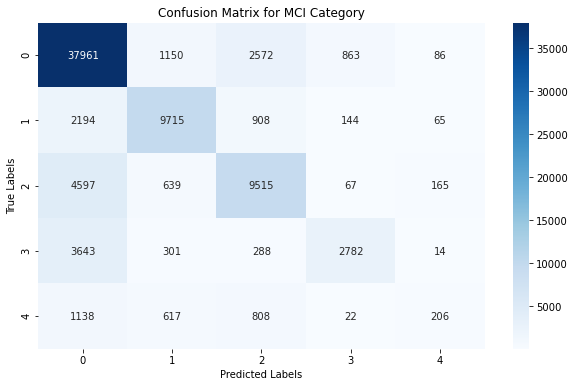

In [206]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
le = LabelEncoder()
df['mci_category_encoded'] = le.fit_transform(df['MCI_CATEGORY'])  # Encode the original mci_category
# y_test and y_pred should use this encoded column

category_names = le.classes_

# Step 4: Plot the Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MCI Category')
plt.show()

According to the confusion matrix for Random Forest Regressor, most predictions are correctly classified as indicated by high diagonal values in the confusion matrix. However, it struggles slightly with certain categories, evident from some misclassifications in off-diagonal cells, suggesting room for fine-tuning.

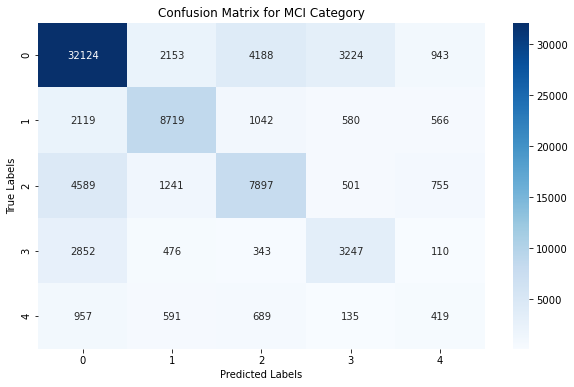

In [209]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
# Step 4: Plot the Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MCI Category')
plt.show()

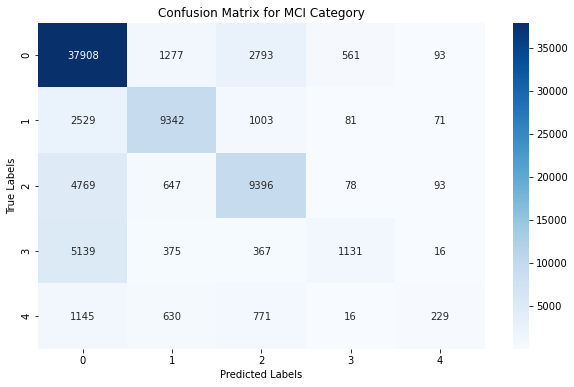

In [210]:
cm_xg = confusion_matrix(y_test, y_pred_xg)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MCI Category')
plt.show()

In [213]:
print({i: label for i, label in enumerate(le.fit(df['MCI_CATEGORY']).classes_)})

{0: 'Assault', 1: 'Auto Theft', 2: 'Break and Enter', 3: 'Robbery', 4: 'Theft Over'}


The Random Forest classifier achieved the highest accuracy, as indicated by the high number of correct classifications along the diagonal of its confusion matrix. Decision Tree classifier underperformed, showing more misclassifications in off-diagonal cells. The XGBoost classifier performed better than the Decision Tree, with fewer misclassifications, but not as well as the Random Forest, demonstrating a solid improvement but still room for enhancement

Among the classifiers, the Random Forest model demonstrated the highest overall accuracy, particularly excelling in predicting the Assault category, which was most accurately classified due to its significant representation in the dataset. However, it struggled with categories like Theft Over, resulting in fewer correct predictions. The Decision Tree classifier, while not performing well overall, did manage to classify the Robbery and Theft over categories more effectively than the other models. On the other hand, the XGBoost classifier outperformed the Decision Tree by reducing misclassifications in categories such as Assault, Auto Theft, Break and Enter, but it still fell short of the Random Forest's accuracy. While Assault was consistently predicted correctly across all models, the less frequent category of Theft Over posed significant challenges, suggesting the need for further fine-tuning and potential dataset balancing to improve overall model performance.

In [211]:
df = pd.read_csv(r"C:\Users\pbhav\Downloads\Major_Crime_Indicators_Open_Data_6927126107499016617.csv")

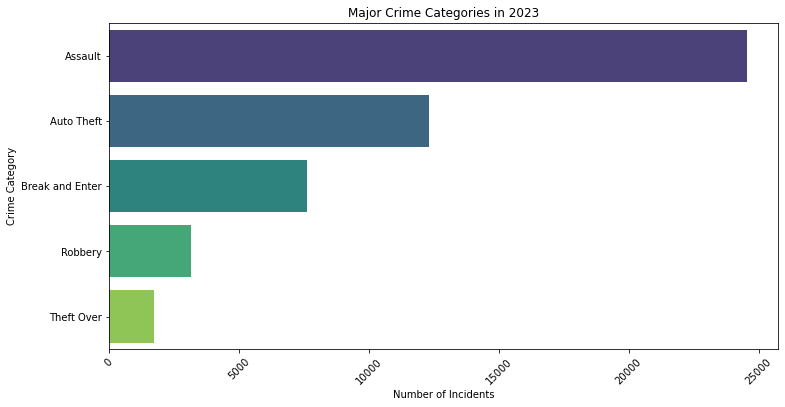

In [212]:
# Step 1: Filter the data for the year 2023
df_2023 = df[df['REPORT_YEAR'] == 2023]

# Step 2: Count the occurrences of each crime category
crime_counts = df_2023['MCI_CATEGORY'].value_counts()

# Convert to DataFrame for better plotting
crime_counts_df = crime_counts.reset_index()
crime_counts_df.columns = ['MCI_CATEGORY', 'Count']

# Step 3: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='MCI_CATEGORY', data=crime_counts_df, palette='viridis')
plt.title('Major Crime Categories in 2023')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Category')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

The bar chart illustrates that Assault is the predominant crime type in the dataset. To predict crime trends for 2023, another dataset will be utilized, focusing on Neighbourhood Crime Rates per 100,000. This will enable a deeper analysis and forecasting of crime occurrences in the year 2023.

## Dataset Selection and Objective Definition - Regression

**Dataset for Regression Task:** The Neighbourhood Crime Rates dataset is used for this regression task, which includes detailed statistics on crimes such as Assault, Auto Theft, Break and Enter, and Robbery, reported at the neighbourhood level with rates per 100,000 people.

**Objective:** The objective is to predict the incidence of Assault crimes for the year 2023 using regression analysis. This prediction will leverage the Neighbourhood Crime Rates per 100,000 dataset, which provides comprehensive data on various crime types by neighbourhood. This dataset is utilized for the regression task to identify and analyze factors influencing Assault occurrences, enabling informed decision-making for community safety initiatives.

*Link to Dataset:* https://data.torontopolice.on.ca/datasets/TorontoPS::neighbourhood-crime-rates-open-data/about 

In [1]:
import pandas as pd

df1 = pd.read_csv(r"C:\Users\pbhav\Downloads\Neighbourhood_Crime_Rates_Open_Data_3697982984091198555.csv")

In [2]:
df1.head()

,OBJECTID_1,NEIGHBOURHOOD_NAME,HOOD_158,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,ASSAULT_2020,...,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,THEFTOVER_RATE_2023,POPULATION_2023,Shape__Area,Shape__Length
0,1,South Eglinton-Davisville,174,63,61,70,82,85,70,82,...,5.237247,15.232292,14.822866,24.197842,28.634151,14.006910,36.385136,21987,9.443090e+05,4005.549887
1,2,North Toronto,173,45,52,43,52,55,77,72,...,16.500288,39.413528,30.234316,43.830814,14.241971,27.502750,46.428333,15077,4.020308e+05,2543.945884
2,3,Dovercourt Village,172,56,57,79,94,94,96,75,...,22.146759,29.146021,21.698250,21.709240,14.541224,29.008631,21.681000,13837,1.503002e+06,4965.496448
3,4,Junction-Wallace Emerson,171,154,157,166,157,157,182,169,...,24.404133,27.956388,15.754854,35.254025,31.309929,31.035419,34.298782,26240,2.222867e+06,7435.192384
4,5,Yonge-Bay Corridor,170,394,524,487,603,576,660,383,...,289.951111,349.539246,481.909271,259.798096,188.651871,358.826416,346.208679,14731,1.118725e+06,4811.107669


## Data Preprocessing

In [3]:
df1.dtypes

OBJECTID_1               int64
NEIGHBOURHOOD_NAME      object
HOOD_158                 int64
ASSAULT_2014             int64
ASSAULT_2015             int64
                        ...   
THEFTOVER_RATE_2022    float64
THEFTOVER_RATE_2023    float64
POPULATION_2023          int64
Shape__Area            float64
Shape__Length          float64
Length: 186, dtype: object

### Handling Missing values

In [4]:
df1.isnull().sum()

OBJECTID_1             0
NEIGHBOURHOOD_NAME     0
HOOD_158               0
ASSAULT_2014           0
ASSAULT_2015           0
                      ..
THEFTOVER_RATE_2022    3
THEFTOVER_RATE_2023    2
POPULATION_2023        0
Shape__Area            0
Shape__Length          0
Length: 186, dtype: int64

In [5]:
df1.isnull().sum().sum()

772

In [6]:
def fill_missing_values(column):
    if column.dtype == 'object':  # Categorical columns
        return column.fillna(column.mode()[0])  # Fill with mode
    elif column.dtype in ['int64', 'float64']:  # Numerical columns
        return column.fillna(column.mean())  # Fill with mean
    return column  # Return unchanged for other types

# Apply the function to all columns
df1 = df1.apply(fill_missing_values)


In [7]:
df1.isnull().sum().sum()

0

In [8]:
df1.shape

(158, 186)

In [9]:
df1.columns

Index(['OBJECTID_1', 'NEIGHBOURHOOD_NAME', 'HOOD_158', 'ASSAULT_2014',
       'ASSAULT_2015', 'ASSAULT_2016', 'ASSAULT_2017', 'ASSAULT_2018',
       'ASSAULT_2019', 'ASSAULT_2020',
       ...
       'THEFTOVER_RATE_2017', 'THEFTOVER_RATE_2018', 'THEFTOVER_RATE_2019',
       'THEFTOVER_RATE_2020', 'THEFTOVER_RATE_2021', 'THEFTOVER_RATE_2022',
       'THEFTOVER_RATE_2023', 'POPULATION_2023', 'Shape__Area',
       'Shape__Length'],
      dtype='object', length=186)

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID_1,158.0,7.950000e+01,4.575478e+01,1.000000,4.025000e+01,7.950000e+01,1.187500e+02,1.580000e+02
HOOD_158,158.0,8.810759e+01,5.123638e+01,1.000000,4.325000e+01,8.850000e+01,1.337500e+02,1.740000e+02
ASSAULT_2014,158.0,1.046203e+02,7.928218e+01,15.000000,5.300000e+01,8.250000e+01,1.310000e+02,4.490000e+02
ASSAULT_2015,158.0,1.131329e+02,8.983120e+01,12.000000,5.725000e+01,9.000000e+01,1.387500e+02,5.240000e+02
ASSAULT_2016,158.0,1.178861e+02,9.391919e+01,12.000000,5.775000e+01,9.150000e+01,1.385000e+02,5.590000e+02
...,...,...,...,...,...,...,...,...
THEFTOVER_RATE_2022,158.0,4.784888e+01,4.375279e+01,4.311274,2.465181e+01,3.975342e+01,5.342835e+01,3.588264e+02
THEFTOVER_RATE_2023,158.0,5.553562e+01,5.202046e+01,3.788596,2.461039e+01,4.408858e+01,6.205845e+01,3.462087e+02
POPULATION_2023,158.0,1.906524e+04,6.732483e+03,7057.000000,1.376650e+04,1.808000e+04,2.347700e+04,3.638800e+04
Shape__Area,158.0,4.067004e+06,3.864570e+06,402030.818359,1.758514e+06,3.138953e+06,5.168302e+06,3.014534e+07


In [11]:
#Only relevant features are selected for modeling to enhance performance and reduce complexity.

features = df1[['ASSAULT_RATE_2014', 'ASSAULT_RATE_2015', 'ASSAULT_RATE_2016',
                 'ASSAULT_RATE_2017', 'ASSAULT_RATE_2018', 'ASSAULT_RATE_2019',
                 'ASSAULT_RATE_2020', 'ASSAULT_RATE_2021', 'ASSAULT_RATE_2022', 
                 'POPULATION_2023']] # Selected relevant features for modeling

target = df1['ASSAULT_RATE_2023']   # Target variable representing the crime category


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [16]:
# Standardization
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Implementation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

### Liner Regression

In [21]:
# Train the model

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test_scaled)

### XG Boost Regressor

In [22]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model Evaluation

In [30]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error for Linear Regression: {mae}')
print(f'R² Score for Linear Regression: {r2}')

Mean Absolute Error for Linear Regression: 96.37370815082008
R² Score for Linear Regression: 0.9295987082438761


In [24]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'R² Score (XGBoost): {r2_xgb}')

Mean Absolute Error (XGBoost): 126.54926583324584
R² Score (XGBoost): 0.8624291839789694


# Results Interpretation

The Mean Absolute Error (MAE) for the Linear Regression model is approximately 96.37, indicating that, on average, the predicted values for Assault incidents deviate from the actual values by about 96 occurrences. With an R² score of 0.93, this model explains around 93% of the variance in Assault predictions for the year 2023, demonstrating a strong fit to the data.

In comparison, the XGBoost model has a Mean Absolute Error of approximately 126.55, suggesting a higher average deviation in its predictions. The R² score of 0.86 indicates that this model explains about 86% of the variance in Assault predictions. Although the XGBoost model performs well, the lower R² score compared to the Linear Regression model suggests that it may have room for improvement in capturing the underlying patterns of Assault occurrences for 2023. Overall, both models provide valuable insights for predicting Assault incidents, with Linear Regression offering slightly more accurate predictions in this case.

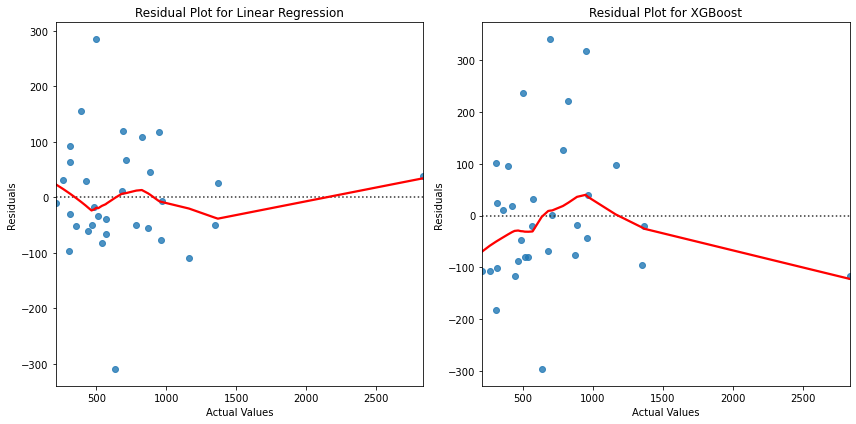

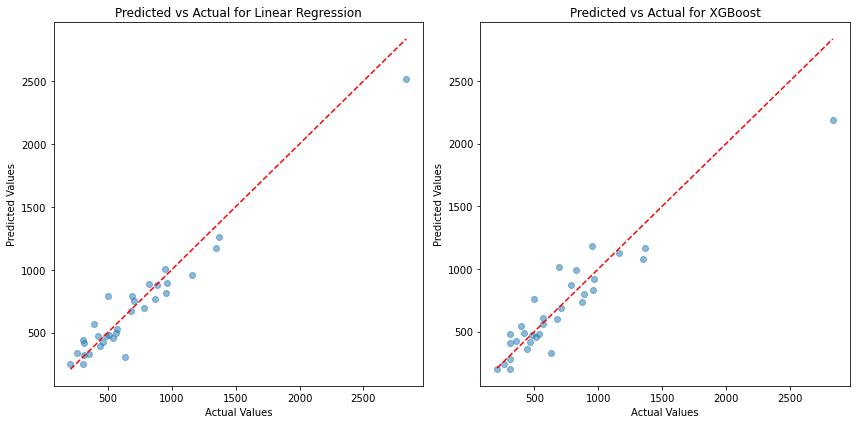

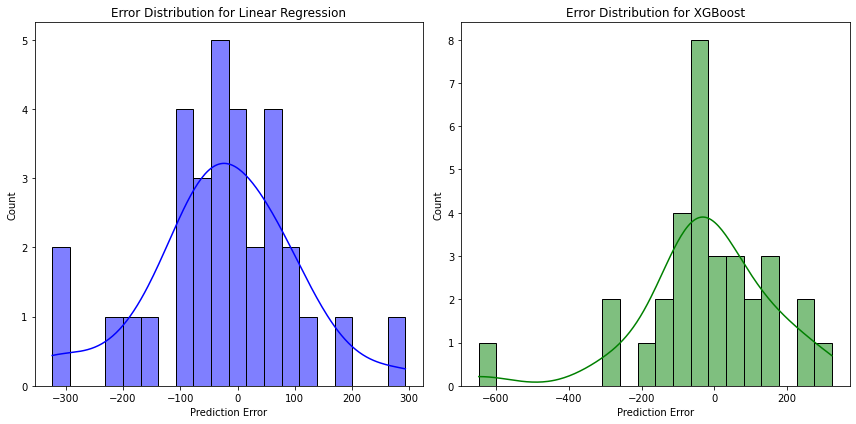

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test, y_pred_lr (Linear Regression), and y_pred_xgb (XGBoost) are defined
# Residual Plot
plt.figure(figsize=(12, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.residplot(x=y_test, y=y_pred- y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")

# XGBoost Residuals
plt.subplot(1, 2, 2)
sns.residplot(x=y_test, y=y_pred_xgb - y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for XGBoost")

plt.tight_layout()
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual for Linear Regression")

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual for XGBoost")

plt.tight_layout()
plt.show()

# Error Distribution Plot
plt.figure(figsize=(12, 6))

# Linear Regression Errors
plt.subplot(1, 2, 1)
sns.histplot(y_pred - y_test, kde=True, color="blue", bins=20)
plt.xlabel("Prediction Error")
plt.title("Error Distribution for Linear Regression")

# XGBoost Errors
plt.subplot(1, 2, 2)
sns.histplot(y_pred_xgb - y_test, kde=True, color="green", bins=20)
plt.xlabel("Prediction Error")
plt.title("Error Distribution for XGBoost")

plt.tight_layout()
plt.show()

# Report

### Introduction

This report presents a comprehensive analysis of Toronto crime data, utilizing the Major Crime Indicator (MCI) dataset for classification and the Neighbourhood Crime Rates dataset for regression tasks.  The classification analysis aims to predict crime categories such as Assault, Robbery, Auto Theft, and Break and Enter based on attributes like year, division, and location. The regression task focuses on predicting 2023 Assault rates by neighborhood, using historical crime rates per 100,000 people. The report includes detailed sections on data preprocessing, model implementation, evaluation, and results interpretation, offering insights into trends for both crime categorization and incidence prediction.


### Data Preprocessing

In the data preprocessing stage for **Classification**, the dataset was first loaded using pandas from a CSV file which resulted in a shape of (408,928, 31). The data types of the columns were examined to identify appropriate data transformations which revealed a mix of integer, float, and object types. Since the occurrence dates were often missing, the reporting dates were used as substitutes under the assumption that most crimes are reported close to when they occurred to handle missing values. The REPORT_DATE and OCC_DATE fields were converted to datetime objects for easier manipulation, allowing for the replacement of missing occurrence-related fields with derived values from OCC_DATE. Additionally, an outlier detection method is used for the Interquartile Range (IQR) to ensure data quality. The categorical variables were converted to a categorical data type, excluding unique identifiers, and label encoding was employed to convert categorical variables into numerical format. Feature scaling was implemented using StandardScaler to normalize the features to ensure the model's learning efficiency. The final feature set was selected to enhance model performance focusing on relevant attributes like REPORT_YEAR, OCC_YEAR, and geolocation data.

Also, for feature selection, the features such as ucr_code and ucr_ext are excluded from the analysis because they yield 100% accuracy, indicating that they may lead to overfitting rather than providing meaningful insights into the classification task.

Next, for **Regression**, the dataset examined consists of assault incident data spanning from 2014 to 2022, accompanied by neighborhood population figures and theft rates. This dataset contains 158 records and 186 features, indicating a rich source of information. However, it also contains missing values—772 in total. To ensure data integrity missing categorical values were filled with the mode, while numerical values were filled with the mean, resulting in a clean and complete dataset suitable for analysis.Relevant features for modeling were carefully selected, focusing on those most indicative of future assault trends. The input features included the assault rates from 2014 to 2022 and the population estimates for 2023 with the target variable being the predicted assault rate for 2023. This feature selection is crucial, as historical assault data serves as a primary crime indicator for suggesting trends that can inform future predictions. 

Also, assault is selected based on the major crime indicator dataset, since based on bar chart, it reveals that it's the major contributing category in crime and therefore predictions are done for assault for the year of 2023, since there is no daata available for 2024.


### Model Implementation

The classification model implementation involved using several algorithms to predict crime categories. The first model selected was the Random Forest Classifier due to its ability to handle complex datasets while managing both numerical and categorical data effectively. After splitting the dataset into training and testing sets, the model was trained using the fit method. Following the Random Forest, a Decision Tree Classifier was implemented, chosen for its simplicity and interpretability, allowing for clear insights into the decision-making process. Finally, the XGBoost Classifier was introduced, leveraging its advanced regularization techniques for high performance in large datasets. Each model was fitted to the training data and predictions were made on the test set, setting the stage for a comprehensive evaluation of their predictive capabilities.

Linear Regression and XGBoost Regressor were chosen for their effectiveness in regression tasks and their differing approaches to capturing data patterns. To enhance the models' performance, the dataset was split into training and testing subsets with 80% of the data allocated for training and 20% for testing. This division is essential for evaluating the model’s ability to generalize to unseen data. Next, features were standardized using StandardScaler to ensure equal treatment of all variables, which is particularly important for algorithms sensitive to feature scaling, such as XGBoost. The Linear Regression model was trained on the scaled training data, followed by predictions on the test set. Similarly, the XGBoost Regressor was trained on the original feature set to leverage its capability to model complex interactions and nonlinear relationships within the data.


### Model Evaluation

The evaluation of the models involved calculating accuracy scores and generating confusion matrices for each classifier to assess their predictive performance. The Random Forest Classifier achieved an accuracy score of 0.75, indicating strong performance in predicting the target variable. In contrast, the Decision Tree Classifier recorded a lower accuracy of 0.65, highlighting a tendency for misclassifications. The XGBoost Classifier exhibited moderate performance with an accuracy of 0.72, falling between the Random Forest and Decision Tree classifiers. These scores were complemented by confusion matrices, which visually represented the models' predictions against the actual classifications. The confusion matrices revealed the number of correct and incorrect predictions for each category, providing further insights into the classifiers' strengths and weaknesses.

Model performance was evaluated using Mean Absolute Error (MAE) and R² score. Mean Absolute Error (MAE) is chosen over Root Mean Squared Error (RMSE) due to its interpretability, robustness to outliers, equal weighting of errors, and alignment with practical decision-making in crime prediction. The Linear Regression model achieved an MAE of approximately 96.37 and an R² score of 0.93, indicating a strong correlation between the predicted and actual values. This high R² score suggests that the model explains about 93% of the variance in assault predictions for 2023. In contrast, the XGBoost model produced a higher MAE of around 126.55 and an R² score of 0.86, indicating that while effective, it is less precise than the Linear Regression model.


### Results Interpretation

The results interpretation highlighted the Random Forest Classifieras the most effective model, demonstrating the highest accuracy and successfully predicting the Assault category, which had significant representation in the dataset. However, it faced challenges in accurately predicting the Theft Over category, indicating potential areas for improvement. The Decision Tree Classifier, while underperforming overall, showed a better classification of the Robbery and Theft Over categories, suggesting that its simplicity may have allowed it to grasp specific patterns in the data. The XGBoost Classifier outperformed the Decision Tree, reducing misclassifications in several categories, but still lagged behind the Random Forest in overall accuracy. The consistent accuracy in predicting Assault across all models suggested a reliable trend, but the challenges faced in predicting less frequent categories, particularly Theft Over, emphasized the need for further tuning and possible dataset balancing to enhance model performance.

The residual plot reveals that Linear Regression's residuals are tightly clustered around zero, indicating minimal error, whereas XGBoost shows more spread, reflecting higher variability in predictions. In the predicted vs. actual plot, Linear Regression's predictions align closely with actual values along the diagonal, reinforcing its effectiveness in capturing the linear relationship within the data. While XGBoost exhibits some alignment, it demonstrates minor deviations, indicating less proficiency in identifying linear trends. Furthermore, the error distribution plot confirms that Linear Regression has a balanced error pattern, while XGBoost's distribution is slightly skewed, suggesting occasional over- or underestimation. These findings collectively indicate that Linear Regression is the superior model for this dataset, given its consistent accuracy and minimal error.


### Findings

The analysis demonstrates that different classifiers meet the objectives of accurately predicting crime categories with varying effectiveness. The Random Forest Classifier stands out as the best performer, aligning with the objective to maximize predictive accuracy, particularly for Assault incidents. Its ensemble approach effectively captures complex patterns in the data. The Decision Tree Classifier, while less accurate overall, identifies specific categories well, showcasing its potential for targeted predictions despite its limitations. The XGBoost Classifier improves upon the Decision Tree, offering a balanced performance that meets the objective of providing reliable predictions across multiple categories. These findings emphasize the necessity of selecting models that not only achieve high accuracy but also address the specific classification objectives, particularly for infrequent crime categories

The analysis confirms that assault remains a significant crime indicator within neighborhoods as indicated by historical trends. Predicting assault incidents for 2023 based on data from prior years allows for effective anticipation and addressing of potential increases in crime. The strong performance of the Linear Regression model supports the notion that straightforward predictive models can often yield more reliable results, particularly when relationships between variables are linear.


### Potential Implications of Results

Based on the findings, assault incidents are a significant crime indicator and can be reliably predicted using historical data for several real-world implications. Law enforcement agencies can utilize these predictions to prioritize resources and interventions in neighborhoods with forecasted increases in assault rates for upcooming years. For instance, if the analysis indicates a rising trend in specific categories like Robbery or Auto Theft, authorities can devise targeted outreach and educational programs to raise awareness and mitigate risks. This proactive approach could lead to enhanced community policing strategies and targeted outreach programs aimed at preventing violence. Furthermore, the identification of specific neighborhoods with higher assault rates allows for tailored crime prevention initiatives, such as community engagement activities, educational programs, and increased surveillance measures. Such strategic planning not only helps in reducing crime but also fosters community trust and collaboration, ultimately contributing to a safer urban environment. Additionally, insights gained from the analysis can inform local policymakers about the effectiveness of existing safety measures and the need for potential adjustments to address rising crime trends.


### Conclusion

The comprehensive analysis of Toronto crime data through both classification and regression tasks has yielded valuable insights into crime prediction and categorization. The Random Forest Classifier emerged as the most effective tool for predicting crime categories, particularly assaults, while the Linear Regression model demonstrated a strong capacity for forecasting assault rates for 2023 based on historical trends. These findings affirm the utility of machine learning in crime analysis, highlighting the importance of employing diverse modeling techniques to capture the complexities of crime patterns.


### References

ChatGPT

Microsoft Bing

Google Gemini

Blackbox AI

Oliveira, "Major Crime Indicators in Toronto in 2019", Medium. 29 Jan 2021, https://medium.com/analytics-vidhya/major-crime-indicators-in-toronto-2019-dbbeaeb01d12

Gubrani, "Evaluating Multi-Class Classification Model using Confusion Matrix in Python", Medium. 1 March, 2024, https://medium.com/@gubrani.sanya2/evaluating-multi-class-classification-model-using-confusion-matrix-in-python-4d9344084dfa

Park, "How to Interpret a Residual Plot", Study.com, https://study.com/skill/learn/how-to-interpret-a-residual-plot-explanation.html?srsltid=AfmBOopgO3ie5tZuZ3HQp-THoKXQ5LzwSodcbYCt4QDdEoSgkNevh8ON

Colmenares, "Choosing the Right Classification Algorithm", Medium. 12 Nov 2023, https://medium.com/@albane.colmenares/choosing-the-right-classification-algorithm-0cca6f95d593

Oliver, "GPs vs. Linear Regression vs. XGBoost", Medium. 13 May 2024, https://medium.com/internet-of-technology/gps-vs-linear-regression-vs-xgboost-886fac83d5a3



# Individual Reflection

### Challenges

The analysis process encountered several challenges, particularly around handling missing values, outliers and model selection and around selecting the appropriate evaluation metrics. 

Initially, I found it difficult to identify a relevant dataset that demonstrated strong connections between features, because I want to choose both dataset around one topic. After choosing the dataset, I had to deal with missing values, which required me to use imputation techniques to maintain the integrity of the data. In the classification phase, I encountered issues with the Support Vector Machine (SVM) model, which took over 15 minutes to run without producing any results. This prompted me to switch to simpler models like K-Nearest Neighbors (KNN) and Naive Bayes; however, they only provided around 30% accuracy. For regression, I struggled with picking the right evaluation metrics. While Root Mean Square Error (RMSE) showed high values that were hard to interpret, I decided to use Mean Absolute Error (MAE) because it was easier to understand. Additionally, when I trained a Random Forest Regressor, it resulted in a lower-than-expected R² score, highlighting the need for better feature selection and model tuning. Overall, these challenges taught me the importance of experimenting with different approaches and carefully choosing models to improve prediction accuracy.


### Solutions

First, for dataset selection, I conducted a thorough literature review to identify datasets that were not only relevant but also had a strong connection between features, ensuring that my analysis was based on high-quality data. To tackle missing values, I used advanced imputation techniques such as mode substitution for categorical data, which helped maintain the dataset's integrity without introducing significant bias. In the classification phase, I initially trained an SVM model, but due to its long training time without yielding results, I pivoted to using Random Forest and XGBoost, which provided better outcomes in a more reasonable timeframe. For the regression models, I experimented with multiple evaluation metrics, ultimately opting for Mean Absolute Error (MAE) for its interpretability, which allowed for a clearer understanding of the model's performance. Additionally, I relied on a trial-and-error approach to refine the models, which enabled me to identify the most effective features and optimize the overall performance. Overall, these strategies helped me navigate the challenges effectively and enhanced the quality of my analysis.


### Insights Gained

Throughout my analysis, I learned some key lessons about working with regression and classification techniques. First, I realized how important it is to have good quality data—choosing a dataset with strong connections between features really matters for building effective models. I also found that understanding the data helps in picking the right models and tuning them properly.

Choosing the right evaluation metrics was another important takeaway; while RMSE is useful, I discovered that Mean Absolute Error (MAE) gives clearer insights into how well a model is performing, making it easier to understand. Additionally, I learned that sometimes simpler models can work better than more complex ones, especially when training time and resources are limited. This flexibility in my approach helped me find better solutions with Random Forest and XGBoost. Finally, the process reinforced the idea that experimentation is key; trying different methods and refining my models through trial and error is essential for success in data analysis. Overall, these experiences have given me a clearer understanding of machine learning and how to tackle future challenges more effectively.